<h1><center>Springboard Data Science Intensive Capstone Project</center></h1> 
#### <center>Patrick Long<center>May, 2017

<h1><center>Introduction</center></h1> 
#### Background
The quality of patient hospital experience is of profound relevance in our current healthcare environment impacting patients and providers alike.  Patient experience now plays a consequential role in determining levels of Medicare reimbursement, which places significant financial pressure on hospitals to understand facets of care that contribute to patient experience. Additionally, the rising emphasis on patient choice in the healthcare market will likely penalize hospitals that fail to meet patient expectations by reducing patient demand. These trends may be further driven by the growing utility of big data that will make metrics of patient experience at regional hospitals more transparent to the patients themselves, which may influence healthcare purchasing behavior. 


#### The Problem to be Addressed
Data relating to patient experience for individual hospitals is publically available to consumers at [data.medicare.gov](https://data.medicare.gov/Hospital-Compare/Patient-survey-HCAHPS-Hospital/dgck-syfz "Patient survey (HCAHPS) - Hospital") and is aggregated a <i>"Below"</i>, <i>"Same as"</i>, or <i>"Above"</i> the national average.  However, the API for these databases is difficult to navigate and patient experience ratings are not available for hospitals excluded from the Medicare database. The primary goal of this analysis will be to develop a model to predict patient experience using publically available Medicare data. Secondarily, developing a model  with good predictive accuracy may identify the specific hospital attributes important to patient satisfaction. Briefly, this undertaking will address the following questions:

* How does publically available Medicare Hospital Compare data (e.g. geographic location, hospital type, hospital model of ownership, the use of electronic medical records, the effective use of medical imaging, timeliness of care, hospital readmissions metrics, Medicare spending per patient) predict patient experience? 

* What hospital attributes provide the greatest predictive value toward patient satisfaction?

#### The Potential Utility
Predictive analytics on patient satisfaction could be valuable to multiple client types. Two examples are provided below:

* A government agency or policy maker tasked with evaluating hospital performance metrics as they relate to patient satisfaction. 

* A company developing a patient facing hospital ratings software designed to provide indicators of patient satisfaction at various types of hospitals. The models generated using this data set could be used to predict satisfaction at hospitals not currently in the Medicare data base. 

#### Data Sources
Note: Downloadable access to these data sets is scheduled to expire July, 2017.
Data is derived from several datasets available on at [data.medicare.gov](https://data.medicare.gov/data/hospital-compare). 

* [Hospital General Information](https://data.medicare.gov/Hospital-Compare/Hospital-General-Information/xubh-q36u)
* [Readmissions information](https://data.medicare.gov/Hospital-Compare/Hospital-Readmissions-Reduction-Program/9n3s-kdb3)
* Medicare hospital spending per patient (Medicare Spending per Beneficiary): No longer Accessible Online. See "<b>Medicare_hospital_spending_per_patient\__Medicare_Spending_per_Beneficiary____Additional_Decimal_Places</b>" on this github account.
* The data set was also merged with a dictionary of time zones to better inspect regional patterns.

#### Key Terms Defined by Data/Medicare.gov
* <b>Number of Discharges</b>: Number of patients discharged over 30-day period for heart attack, heart failure, and pneumonia. 
* <b>Number of Readmissions</b>: Number of patients readmitted over 30-day period for heart attack, heart failure, and pneumonia. 
* <b>Excess Readmission Ratio (ERR)</b>: This ratio is created by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.
* <b>MSPB</b>: The Medicare hospital spending per patient (Medicare Spending per Beneficiary, MSPB) measure indicates whether Medicare spends more, less or about the same per Medicare patient treated in a specific hospital, compared to how much Medicare spends per patient nationally. This measure includes any Medicare Part A and Part B payments made for services provided to a patient during the 3 days prior to the hospital stay, during the stay, and during the 30 days after discharge from the hospital. 
* <b>EHR</b>: The use of electronic health records (EHR).
* <b>Hospital Type</b>: Hospital Type i.e. critical access, acute care, childrens'.
* <b>Hospital Ownership</b>: Model of hospital ownership e.g. government run, proprietary, volunteer/non-profit.
* <b>Emergency Services</b>:
* <b>Safety of Care</b>: Safety of care ratings for a hospital (below, same as, or above national average).
* <b>Effectiveness of Care</b>: Effectiveness of care ratings for a hospital (below, same as, or above national average).
* <b>Timeliness of Care</b>: Timeliness of care ratings for a hospital (below, same as, or above national average).
* <b>Efficient use of Medical Imaging</b>:
* <b>Hospital Overall rating</b>: An aggregate score of hospital rating from low to high (1 - 5) dervied from the above measures. Will be used for data exploration but not prediction of patient experience.


<h1><center>Medicare Data Wrangling</center></h1>

Data wrangling for this analysis required the combination of multiple csv files accessed via [data.medicare.gov](https://data.medicare.gov/data/hospital-compare). (Note: Access to these data sets expires July, 2017). Each csv file was uploaded, cleaned separately, and saved before merging.   
<br>The workflow is all follows:
* Import csv file
* Tidy column: rename where appropriate, select relevant columns, append each column with a letter to track its original source:
<br>g = general hospital data;
m = Medicare spending per beneficiary data;
r = readmissions data
* Convert columns to appropriate data types and wrangle null values
* Save as a cleaned csv file
* Merge cleaned data sets and save as a csv file

### Import Packages

In [59]:
## Import packages
import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import normalize 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from matplotlib import rcParams
rcParams['xtick.major.pad'] = 1
rcParams['ytick.major.pad'] = 1

#### General Hospital Information
* The first csv file covered general hospital information and performance metrics. This included hospital name, location, ownership model and hospital type, as well the presence or absence of emergencies services, EHRs, and several ratings related to hospital performance that are ranked relative to the national average. The latter includes safety, effectiveness and timeliness of care ratings, efficient use of medical imaging ratings, and a high level aggregated score of a hospital's overall rating that subsumes all other performance metrics. 

In [2]:
# Import csv
general_raw = 'Hospital_General_Information.csv'
g = pd.read_csv(general_raw)

# Tidy column names
g.columns = g.columns.str.replace(' ', '_')

g = g[['Hospital_Name',
       'State', 
       'ZIP_Code', 
       'Provider_ID', 
       'Hospital_Type', 
       'Hospital_Ownership', 
       'Emergency_Services', 
       'Meets_criteria_for_meaningful_use_of_EHRs', 
       'Hospital_overall_rating',
       'Safety_of_care_national_comparison', 
       'Patient_experience_national_comparison', 
       'Effectiveness_of_care_national_comparison',
       'Timeliness_of_care_national_comparison', 
       'Efficient_use_of_medical_imaging_national_comparison']]

g = g.rename(columns = lambda x: x + '_g')

g.rename(columns = {'Meets_criteria_for_meaningful_use_of_EHRs_g': 'EHRs_g', 
                    'Hospital_Type_g':'Type',
                    'Hospital_Ownership_g':'Ownership_g'}, inplace = True)

g.columns = g.columns.str.replace('_national_comparison', '')

# Convert Emergency Services information from bool to string (This will help preprocessing during machine learning)
g.Emergency_Services_g =  g.Emergency_Services_g.astype('str')

# Assign NA values
g = g.replace('Not Available', np.nan)

# Save cleaned csv
g.to_csv('general_clean_save.csv')
g.head(2)

,Hospital_Name_g,State_g,ZIP_Code_g,Provider_ID_g,Type,Ownership_g,Emergency_Services_g,EHRs_g,Hospital_overall_rating_g,Safety_of_care_g,Patient_experience_g,Effectiveness_of_care_g,Timeliness_of_care_g,Efficient_use_of_medical_imaging_g
0,SOUTHEAST ALABAMA MEDICAL CENTER,AL,36301,10001,Acute Care Hospitals,Government - Hospital District or Authority,True,True,3,Above the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average
1,MARSHALL MEDICAL CENTER SOUTH,AL,35957,10005,Acute Care Hospitals,Government - Hospital District or Authority,True,True,3,Same as the National average,Same as the National average,Same as the National average,Above the National average,Below the National average


####  Medicare Spending per Benificiary (MSPB)
* The second csv file covered Medicare Spending per Benificiary (MSPB) for individual hospitals. MSPBs scores reflect whether Medicare spends more, less or about the same per Medicare patient treated in a specific hospital, compared to how much Medicare spends per patient nationally. A score greater than one indicates Medicare spending above the national average, while a score less than one indicates Medicare spending below the national average.

In [3]:
# Import csv
mspb = pd.read_csv("Medicare_hospital_spending_per_patient__Medicare_Spending_per_Beneficiary____Additional_Decimal_Places.csv")

# Tidy columns and data typesa
mspb.rename(columns = {'Value': 'MSPB'}, inplace = True)

mspb.drop(['Measure_ID', 
           'Footnote', 
           'Start_Date', 
           'End_Date'], inplace = True, axis = 1)

mspb = mspb.rename(columns = lambda x: x + '_m')

mspb['MSPB_m'] = mspb['MSPB_m'].apply(pd.to_numeric, errors='coerce')

# Save cleaned csv
mspb.to_csv('mspb_clean.csv')
mspb.head(2)

,Provider_ID_m,MSPB_m
0,50234,0.861872
1,50235,1.011867


####  Medicare Readmissions Data

* The third csv file used in this analysis covered hospital readmissions metrics. This includes 1) the number of patients discharged over 30-day period for heart attack, heart failure, and pneumonia, 2) the number of patients readmitted over 30-day period for heart attack, heart failure, and pneumonia, and 3)an excess eeadmission ratio (ERR) score that is generated by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. An ERR greater than 1 indicates excess readmissions.

In [4]:
# Import csv
readmissions_raw = 'Hospital_Readmissions_Reduction_Program.csv'
r = pd.read_csv(readmissions_raw)

# Tidy column names 
r.columns = r.columns.str.replace(' ', '_')

r = r[['Hospital_Name', 
       'Measure_Name', 
       'Number_of_Discharges', 
       'Excess_Readmission_Ratio', 
       'Number_of_Readmissions']] 

r = r.rename(columns=lambda x: x + '_r')

# Tidy null values and data types
r = r.replace('Not Available', np.nan)
r.dropna(how = 'any', inplace = True)
r.iloc[:, 2:5] = r.iloc[:, 2:5].apply(pd.to_numeric, errors='coerce')
r = r.replace('READM-30-AMI-HRRP', 'AMI').replace('READM-30-CABG-HRRP','CABG').replace('READM-30-COPD-HRRP','COPD').replace('READM-30-HF-HRRP', 'HF').replace('READM-30-HIP-KNEE-HRRP', 'HIP-KNEE').replace('READM-30-PN-HRRP', 'PN')

# Save cleaned csv
r.to_csv('readmissions_clean_save.csv')

# Create single readmissions data set by averaging readmissions information accross disease types
r.drop(['Measure_Name_r'], axis = 1, inplace = True)
r_means = r.groupby(['Hospital_Name_r']).mean()
r_means.reset_index(inplace = True)


# Save cleaned csv
r_means.to_csv('readmissions_clean_mean_save.csv')
r_means.head(2)

,Hospital_Name_r,Number_of_Discharges_r,Excess_Readmission_Ratio_r,Number_of_Readmissions_r
0,ABBEVILLE GENERAL HOSPITAL,139.5,1.0860,34.0
1,ABBOTT NORTHWESTERN HOSPITAL,503.4,0.9981,75.4


####  Merge Medicare Data Sets
* All cleaned Medicare 

In [5]:
# Merge general hospital data with readmissions data
r_g = pd.merge(left = g, right = r_means, how = 'outer', left_on = 'Hospital_Name_g', right_on = 'Hospital_Name_r')

# Now Merge with MSPB data
r_g_mspb = pd.merge(left = r_g, right = mspb, how = 'outer', left_on = 'Provider_ID_g', right_on = 'Provider_ID_m')

# Drop redundant columns and data that lacks a hospital name since this feature is the data index
r_g_mspb.drop(['Provider_ID_g','Hospital_Name_r', 'Provider_ID_m'], inplace = True, axis = 1)
r_g_mspb.dropna(subset = ['Hospital_Name_g'],axis = 0, inplace = True)

#### Append Time Zone Data

In [6]:
# Create time zone dictionary 
state_to_region = { 'AK': 'US/Alaska', 'AL': 'US/Central', 'AR': 'US/Central', 'AS': 'US/Samoa', 'AZ': 'US/Mountain', 'CA': 'US/Pacific', 'CO': 'US/Mountain', 'CT': 'US/Eastern', 'DC': 'US/Eastern', 'DE': 'US/Eastern', 'FL': 'US/Eastern', 'GA': 'US/Eastern', 'GU': 'Pacific/Guam', 'HI': 'US/Hawaii', 'IA': 'US/Central', 'ID': 'US/Mountain', 'IL': 'US/Central', 'IN': 'US/Eastern', 'KS': 'US/Central', 'KY': 'US/Eastern', 'LA': 'US/Central', 'MA': 'US/Eastern', 'MD': 'US/Eastern', 'ME': 'US/Eastern', 'MI': 'US/Eastern', 'MN': 'US/Central', 'MO': 'US/Central', 'MP': 'Pacific/Guam', 'MS': 'US/Central', 'MT': 'US/Mountain', 'NC': 'US/Eastern', 'ND': 'US/Central', 'NE': 'US/Central', 'NH': 'US/Eastern', 'NJ': 'US/Eastern', 'NM': 'US/Mountain', 'NV': 'US/Pacific', 'NY': 'US/Eastern', 'OH': 'US/Eastern', 'OK': 'US/Central', 'OR': 'US/Pacific', 'PA': 'US/Eastern', 'PR': 'America/Puerto_Rico', 'RI': 'US/Eastern', 'SC': 'US/Eastern', 'SD': 'US/Central', 'TN': 'US/Central', 'TX': 'US/Central', 'UT': 'US/Mountain', 'VA': 'US/Eastern', 'VI': 'America/Virgin', 'VT': 'US/Eastern', 'WA': 'US/Pacific', 'WI': 'US/Central', 'WV': 'US/Eastern', 'WY': 'US/Mountain', '' : 'US/Pacific', '--': 'US/Pacific' }
state_to_region_df = pd.DataFrame(state_to_region.items())
state_to_region_df.columns = ['State_name', 'Region']

# Merge time zones with dataframe and clean data types
r_g_mspb_geo = pd.merge(left = r_g_mspb , right = state_to_region_df, how = 'left', left_on = 'State_g', right_on='State_name')
r_g_mspb_geo.drop(['State_g'], axis = 1, inplace = True)
r_g_mspb_geo['Emergency_Services_g'] = r_g_mspb_geo['Emergency_Services_g'].astype('str')

# Save cleaned csv
r_g_mspb_geo.to_csv('r_g_mspb.csv')
r_g_mspb_geo.head(2)

,Hospital_Name_g,ZIP_Code_g,Type,Ownership_g,Emergency_Services_g,EHRs_g,Hospital_overall_rating_g,Safety_of_care_g,Patient_experience_g,Effectiveness_of_care_g,Timeliness_of_care_g,Efficient_use_of_medical_imaging_g,Number_of_Discharges_r,Excess_Readmission_Ratio_r,Number_of_Readmissions_r,MSPB_m,State_name,Region
0,SOUTHEAST ALABAMA MEDICAL CENTER,36301.0,Acute Care Hospitals,Government - Hospital District or Authority,True,True,3,Above the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average,624.166667,1.041817,106.333333,0.999877,AL,US/Central
1,MARSHALL MEDICAL CENTER SOUTH,35957.0,Acute Care Hospitals,Government - Hospital District or Authority,True,True,3,Same as the National average,Same as the National average,Same as the National average,Above the National average,Below the National average,548.750000,1.033600,87.250000,0.983838,AL,US/Central


<h1><center>Exploration of Medicare Data</center></h1>
This is a high level exporation of this dataset focusing on key data types (i.e. geography, readmissions information, Medicare spending, and hospital ownership and type).

In [7]:
# Import Medicare data
df_exp = pd.read_csv('r_g_mspb.csv', index_col = 0)

In [8]:
# Quick view of columns
column_list = list(df_exp.columns)
for loci, name in enumerate(column_list):
    print(loci, name)

(0, 'Hospital_Name_g')
(1, 'ZIP_Code_g')
(2, 'Type')
(3, 'Ownership_g')
(4, 'Emergency_Services_g')
(5, 'EHRs_g')
(6, 'Hospital_overall_rating_g')
(7, 'Safety_of_care_g')
(8, 'Patient_experience_g')
(9, 'Effectiveness_of_care_g')
(10, 'Timeliness_of_care_g')
(11, 'Efficient_use_of_medical_imaging_g')
(12, 'Number_of_Discharges_r')
(13, 'Excess_Readmission_Ratio_r')
(14, 'Number_of_Readmissions_r')
(15, 'MSPB_m')
(16, 'State_name')
(17, 'Region')


In [9]:
# Perform overview of how hospital attributes relate to patient experience.

set_option('precision', 2)
df_exp.groupby(['Patient_experience_g'])['Hospital_overall_rating_g','Number_of_Discharges_r', 'Excess_Readmission_Ratio_r','Number_of_Readmissions_r', 'MSPB_m'].mean()

,Hospital_overall_rating_g,Number_of_Discharges_r,Excess_Readmission_Ratio_r,Number_of_Readmissions_r,MSPB_m
Patient_experience_g,,,,,
Above the National average,3.68,397.01,0.98,52.02,0.97
Below the National average,2.41,346.42,1.03,63.51,1.01
Same as the National average,3.09,320.34,1.00,54.07,0.98


In [10]:
# Numerize categorical patient experience ratings
e_distribution = df_exp.copy()
experience_dict = {"Below the National average": 1, "Same as the National average": 2, "Above the National average": 3}
e_distribution["Patient_experience_g"] = e_distribution["Patient_experience_g"].map(experience_dict)

#### Medicare Data: Geography

Figure 1. Number of Hospitals in Medicare Dataset by State


![alt text](Medicare_Geo_fig_tableau.png "Title")

Figure 2. Patient Experience by US Time Zone


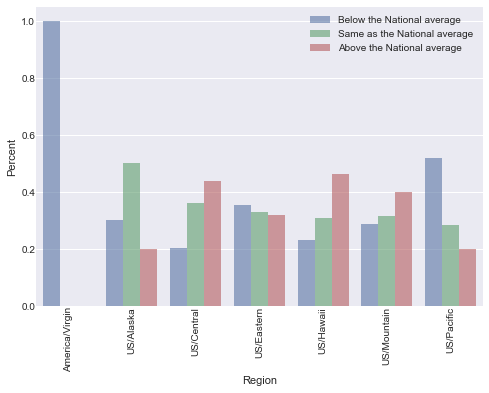

In [11]:
sat_region = pd.DataFrame(df_exp.groupby('Region').Patient_experience_g.value_counts())
sat_region.columns.values[0] = 'Count'
sat_region = sat_region.reset_index()


sat_region_percent_calc = sat_region.groupby('Region').Count.sum()
sat_region_percent_calc = pd.DataFrame(sat_region_percent_calc)
sat_region_percent_calc.reset_index(inplace = True)
sat_region_percent_calc.head(2)

sat_region = pd.merge(sat_region, sat_region_percent_calc, left_on = 'Region', right_on = 'Region')
sat_region['percent'] = sat_region['Count_x'] /sat_region['Count_y']
sat_region.head()

sns.barplot(x = 'Region', y = 'percent', hue = 'Patient_experience_g', data = sat_region, alpha=0.6)
plt.legend(loc='upper right')
plt.xlabel('Region')
plt.ylabel('Percent')
plt.xticks(rotation = 90)
plt.style.context('seaborn-whitegrid')

print('Figure 2. Patient Experience by US Time Zone')
plt.savefig('Fig1.png', dpi=300)
sns.set_style("whitegrid")
plt.show()

#### Quck Summary of Geography Information
* Hospitals in this data set are concentrated in large populous states like California and Texas. 
* Regions with the greatest percentage of hospitals scoring high for patient experience are in the central, mountain and US/Hawaii time zones. 
* Regions with low patient experience ratings are in the Virgin Islands and the US/Pacific time zone. 

#### Medicare Data: Readmissions and MSPB

Figure 3. Patient Experience by Hospital Readmissions Metrics


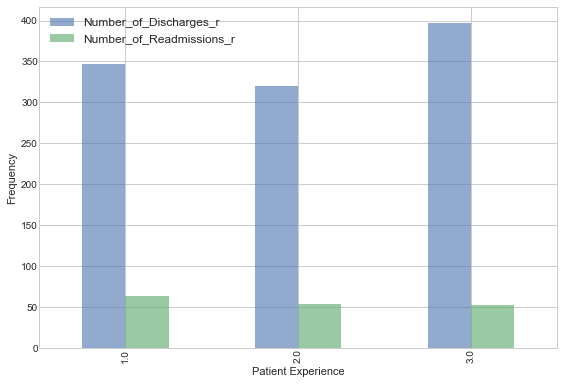

In [12]:
e_distribution.groupby('Patient_experience_g')[['Number_of_Discharges_r','Number_of_Readmissions_r']].mean().plot(kind = 'bar', alpha=0.6)
plt.ylabel('Frequency')
plt.xlabel('Patient Experience')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.style.context('seaborn-whitegrid')
plt.legend(loc='upper left', fancybox=True, fontsize=12)
sns.set_style("whitegrid")
print('Figure 3. Patient Experience by Hospital Readmissions Metrics')
plt.savefig('Fig2.png', dpi=300)

plt.show()

Figure 4. Patient Experience by Readmissions and Spending Metrics


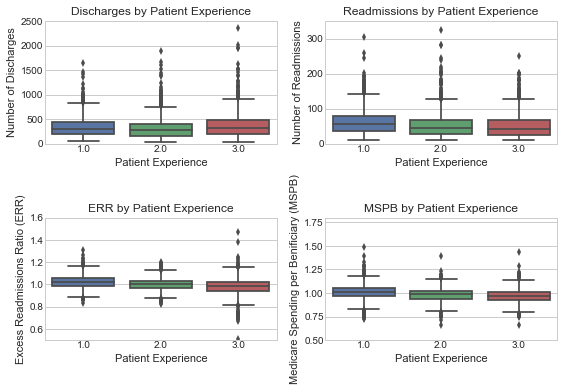

In [13]:
fig = plt.figure()

ax1_dis = fig.add_subplot(2,2,1)
sns.boxplot(x = 'Patient_experience_g', y = 'Number_of_Discharges_r', data = e_distribution)
ax1_dis.set_ylabel('Number of Discharges')
ax1_dis.set_xlabel('Patient Experience')
ax1_dis.set_title('Discharges by Patient Experience')
ax1_dis.set_ylim([0, 2500])

ax2_ream = fig.add_subplot(2,2,2)
sns.boxplot(x = 'Patient_experience_g', y = 'Number_of_Readmissions_r', data = e_distribution)
ax2_ream.set_ylabel('Number of Readmissions')
ax2_ream.set_xlabel('Patient Experience')
ax2_ream.set_title('Readmissions by Patient Experience')
ax2_ream.set_ylim([0, 350])

ax3_err = fig.add_subplot(2,2,3)
sns.boxplot(x = 'Patient_experience_g', y = 'Excess_Readmission_Ratio_r', data = e_distribution)
ax3_err.set_ylabel('Excess Readmissions Ratio (ERR)')
ax3_err.set_xlabel('Patient Experience')
ax3_err.set_title('ERR by Patient Experience')
ax3_err.set_ylim([.5, 1.6])


ax4_mspb = fig.add_subplot(2,2,4)
sns.boxplot(x = 'Patient_experience_g', y = 'MSPB_m',  data = e_distribution)
ax4_mspb.set_ylabel('Medicare Spending per Benificiary (MSPB)')
ax4_mspb.set_xlabel('Patient Experience')
ax4_mspb.set_title('MSPB by Patient Experience')
ax4_mspb.set_ylim([.5, 1.8])
plt.margins(0.5)
plt.tight_layout()
print('Figure 4. Patient Experience by Readmissions and Spending Metrics')
plt.savefig('Fig4.png', dpi=300)
sns.set_style("whitegrid")
plt.show()

#### Quck Summary of Readmissions and MSPB Data
* Hospitals with <i>'Above the national average'</i> rating in patient experience have the highet number of discharges yet the lowest number of readmissions. This trend is reflected it the hospital ERR, as well. 
* MSPB inversely correlates with ratings of patient experience. This suggests that highly rated hospital receive less Medicare reimbursement as measured by MSPB relative to the national average for similar hospitals.

#### Medicare Data: Hospital Ownership and Type

Figure 4. Patient Experience by Hospital Ownership Model and Hospital Type


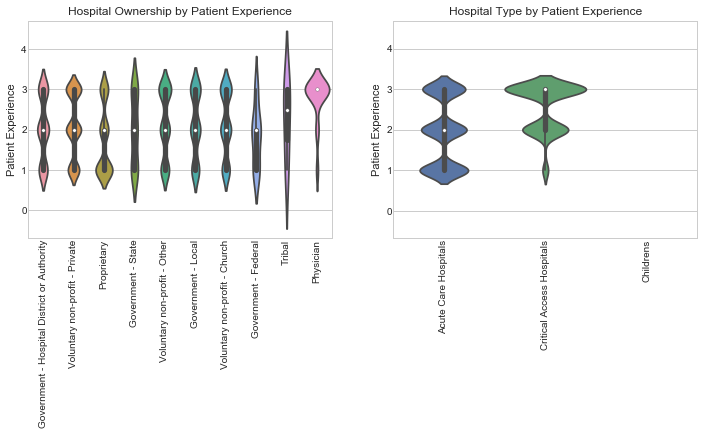

In [14]:
fig = plt.figure(figsize = [12,4])

ax1= fig.add_subplot(1,2,1)
sns.violinplot(x = 'Ownership_g', y = 'Patient_experience_g', showmeans = True, meanline = True, notch = True, showbox = True, data = e_distribution)
ax1.set_ylabel('Patient Experience')
ax1.set_xlabel('')
plt.xticks(rotation = 90)
ax1.set_title('Hospital Ownership by Patient Experience')

ax2= fig.add_subplot(1,2,2)
sns.violinplot(x = 'Type', y = 'Patient_experience_g', showmeans = True, meanline = True, notch = True, showbox = True, data = e_distribution)
ax2.set_ylabel('Patient Experience')
ax2.set_xlabel('')
plt.xticks(rotation = 450)
ax2.set_title('Hospital Type by Patient Experience')
plt.margins(0.5)

plt.savefig('Fig5.png', dpi=300)
print('Figure 4. Patient Experience by Hospital Ownership Model and Hospital Type')
sns.set_style("whitegrid")
plt.show()

#### Quck Summary of Hospital Ownership and Type
* Physician run hospitals show the highest level of patient satisfaction, while proprietary hospital ownership is associated with poor patient satisfaction.
* For hospital type, critical access hospitals have more favorable patient experience ratings relative to acute care hospitals.
* None of the children's hospitals have patient experience ratings and will thus be not be used for machine learning predictions of patient experience. It makes sense that children might not be included in a comprehensive survey about hospital experience, especially in a Medicare affiliated study. 

<h1><center>Machine Learning to Predict Patient Experience</center></h1>

 The following will evaluate the accuracy of linear and non-linear classifiers to  predict patient experience using publically avialable Medicate data.  This approach should also help identify key hospital attributes that are predictive of patient experience.
The work flow for Machine learning will be as follows:
* Analyse data distributions and correlations in preparation for machine learning. This will whether data has normal distributions and show what features are highly correlated, which can impact the performance of certain algorithms.
* 

#### Analyses of Medicare Data Distribution and Correlation in Preparation for Machine Learning

Figure 5. Distributions of Numeric Medicare Data


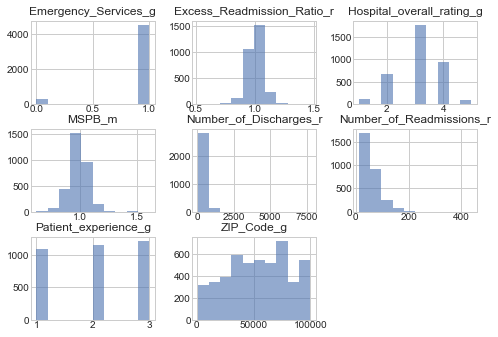

In [15]:
# Histogram of numeric features

fig = plt.figure(figsize = [6,4])
e_distribution.hist(alpha=0.6)
print('Figure 5. Distributions of Numeric Medicare Data')
plt.savefig('Fig6.png', dpi=300)
sns.set_style("whitegrid")
plt.show()

Figure 6. Correlation Heat Map of Numeric Medicare Data


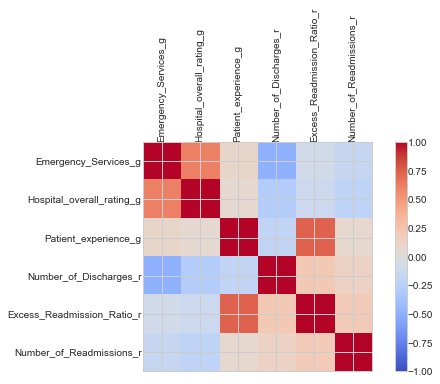

In [16]:
# Create data frame to visualize correlations

e_distribution_corr = e_distribution.copy()
e_distribution_corr = e_distribution_corr.drop(['ZIP_Code_g','Emergency_Services_g'], axis = 1)
e_distribution_corr = e_distribution_corr.corr()

# plot correlation matrix

names_correlations = ['Emergency_Services_g',
                      'Hospital_overall_rating_g', 
                      'Patient_experience_g',
                      'Number_of_Discharges_r', 
                      'Excess_Readmission_Ratio_r',
                      'Number_of_Readmissions_r', 
                      'MSPB_m']

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(e_distribution_corr, vmin=-1, vmax=1, cmap=cm.coolwarm )
fig.colorbar(cax)

ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(names_correlations)
ax.set_yticklabels(names_correlations)

plt.xticks(rotation = 90)
plt.tight_layout()

print('Figure 6. Correlation Heat Map of Numeric Medicare Data')
plt.savefig('Fig7.png', dpi=300)
plt.show()

#### Quck Summary of Data Distribution and Correlations
* Patient experience ratings appears to be evently balanced (~30/30/30), which will help with machine learning models. 
* Both the number of readmissions and the number of discharges per hospital skew right. 
* As one might expect, discharge numbers and readission numbers appear to be highly positively correlated.
* Patient experience is most correlated with ERR.
* Suprisingly, patient experience is not strongly correlated with hosptial overal rating, indicating that the latter is minimally derived from patient exprience ratings (in actuality, patient experience ratings acount for ~20% of hospital overall ratings).

#### Import Cleaned Medicare Data

In [17]:
# Import cleaned data 
df = pd.read_csv('r_g_mspb.csv', index_col = 0)

#### Data Preprocessing

In [18]:
# Select features for predictive analysis. 
# Omit hospital overall rating because it is partially derived from patient experience.

df = df[['Hospital_Name_g', 
         'Type', 
         'Ownership_g', 
         'EHRs_g', 
         'Safety_of_care_g',
         'Effectiveness_of_care_g', 
         'Timeliness_of_care_g', 
         'Emergency_Services_g',
         'Efficient_use_of_medical_imaging_g', 
         'Number_of_Discharges_r',
         'Excess_Readmission_Ratio_r',
         'Number_of_Readmissions_r', 
         'MSPB_m',
         'State_name', 
         'Region',
         'Patient_experience_g']] 

In [19]:
# Drop NA values

df = df.dropna(how = 'any')

In [20]:
# Convert 'patient experience' (target variable) to ordinal numeric values using dictionary and map methods.

p_e_dict = {
    'Below the National average': 0, 
    'Same as the National average': 1, 
    'Above the National average':2 }
df.Patient_experience_g = df.Patient_experience_g.map(p_e_dict)
target = df.Patient_experience_g

In [21]:
# Convert ann strings/categorical data to numeric values with get_dummies() method.

feature_list = ['Type', 
                'Ownership_g', 
                'EHRs_g', 
                'Safety_of_care_g',
                'Effectiveness_of_care_g', 
                'Timeliness_of_care_g', 
                'Emergency_Services_g',
                'Efficient_use_of_medical_imaging_g', 
                'Number_of_Discharges_r',
                'Excess_Readmission_Ratio_r',
                'Number_of_Readmissions_r', 
                'MSPB_m',
                'State_name', 
                'Region']

dummy_df = pd.get_dummies(df[feature_list])

In [22]:
# Split data using test_train_split() method. Use 80% for training.

X_train, X_test, y_train, y_test = train_test_split(dummy_df, target, test_size=0.2, random_state=42)

In [60]:
# Normalize features with normalize() method.

X_train.iloc[:, 0:4] = normalize(X_train.iloc[:, 0:4]).copy()
X_test.iloc[:, 0:4] = normalize(X_test.iloc[:, 0:4]).copy()

#### Test Machine Learning Model Performance Using Default Parameters
* Scikit Learn's classification models have several default parameters that dictate aspects of their behavior. In most cases these parameters need to be optomized to improve model performance; however, running models with their default paramters is a quick way to guage what algorithms may be most appropriate for a particular data set. <br><br>
* Model classification performance will be primarily evaluated by <b>Accuracy:</b>
<i>True Positives / All Instances</i><br><br>
* <b>The supervized learning models tested on this dataset include:</b>
* Logistic Regression (LR)
* Linear Discrimant Analysis (LDA) - for classification
* K-nearest Neighbors (KNN)
* Decision Tree (DTC)
* Random Forest (RFC)
* Support Vector Machine (SVM)
* Multinomial Naive Bayes (NB)

In [24]:
# Prepare lists of algorithms to be used.

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', MultinomialNB()))

In [61]:
# Create loop to serially evaluate models using kfold and cross validation then print performance accuracy.

print("Table X. Accuracy of Patient Experience Predictions for each Machine Learning Algorithm \n")

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold= KFold(len(X_train), n_folds = 5, random_state=2, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    mod = model
    mod.fit(X_train, y_train)
    mod_pred = mod.predict(X_test)
    mod_accuracy = accuracy_score(mod_pred, y_test)
    mod_rmse = (mse(mod_pred, y_test)**1/2)
    msg = "Cross Validation Accuracy %s: %f SD %f - Test Accuracy: %f RMSE: %f" % (name, cv_results.mean(), cv_results.std(),mod_accuracy, mod_rmse)
    print(msg) 

Table X. Accuracy of Patient Experience Predictions for each Machine Learning Algorithm 

Cross Validation Accuracy LR: 0.510730 SD 0.030314 - Test Accuracy: 0.513575 RMSE: 0.402715
Cross Validation Accuracy LDA: 0.541325 SD 0.019142 - Test Accuracy: 0.529412 RMSE: 0.364253
Cross Validation Accuracy KNN: 0.469423 SD 0.020459 - Test Accuracy: 0.502262 RMSE: 0.442308
Cross Validation Accuracy DTC: 0.444514 SD 0.022147 - Test Accuracy: 0.452489 RMSE: 0.457014
Cross Validation Accuracy RFC: 0.483014 SD 0.014331 - Test Accuracy: 0.529412 RMSE: 0.425339
Cross Validation Accuracy SVM: 0.484687 SD 0.026220 - Test Accuracy: 0.497738 RMSE: 0.414027
Cross Validation Accuracy NB: 0.508460 SD 0.030065 - Test Accuracy: 0.520362 RMSE: 0.416290


#### Test Machine Learning Model Performance After Parameter Optimization
* Parameter optimization can be done by serially testing different parameter combinations using SciKit Learn's GridSearchCV method. This allows one identify parameters that perform best by a particular metric (e.g. accuracy).  For example, one can test the kernal type (i.e. 'linear' or 'rbf') for SVM, or the number of neighbors to use when making predictive decisions with KNN and how KNN should calculate distances between neighbors (e.g. minkowski, Manhattan, etc.).

In [26]:
# Define parameters optimization with GridSearchCV.  

SVM_params = {'C':[0.1, 10, 100], 'kernel':['rbf' ,'linear', 'poly', 'sigmoid']}
LR_params = {'C':[0.001, 0.1, 1, 10, 100]}
LDA_params = {'n_components':[None, 1,2,3], 'solver':['svd'], 'shrinkage':[None]}
KNN_params = {'n_neighbors':[1,5,10,20], 'p':[2], 'metric':['minkowski']}
RF_params = {'n_estimators':[10,50,100]}
DTC_params = {'criterion':['entropy'], 'max_depth':[10, 50, 100]}
NB_mult_params = {'alpha':[1,10]}

In [27]:
# Make list of models to test with paramter dictionaries.  

models_opt = []
models_opt.append(('LR', LogisticRegression(), LR_params))
models_opt.append(('LDA', LinearDiscriminantAnalysis(), LDA_params))
models_opt.append(('KNN', KNeighborsClassifier(),KNN_params))
models_opt.append(('DTC', DecisionTreeClassifier(), DTC_params))
models_opt.append(('RFC', RandomForestClassifier(), RF_params))
models_opt.append(('SVM', SVC(), SVM_params))
models_opt.append(('NB', MultinomialNB(), NB_mult_params)) 

In [28]:
# Serially evaluate models with GridSearchCV using defined parameters and print performance as accuracies with SDs.

print("Table X. Accuracy of Patient Experience Predictions for each Machine Learning Algorithm After Serial Optimization \n")

results_params = []
names_params = []
scoring = 'accuracy'
for name, model, params in models_opt:
    kfold= KFold(len(X_train), n_folds = 5, random_state=2, shuffle=True)
    model_grid = GridSearchCV(model, params)
    cv_results_params = cross_val_score(model_grid, X_train, y_train, cv=kfold, scoring=scoring)
    results_params.append(cv_results_params)
    names_params.append(name)
    msg = "Cross Validation Accuracy %s: %f (%f)" % (name, cv_results_params.mean(), cv_results_params.std())
    print(msg)

Table X. Accuracy of Patient Experience Predictions for each Machine Learning Algorithm After Serial Optimization 

Cross Validation Accuracy LR: 0.536790 (0.026505)
Cross Validation Accuracy LDA: 0.541325 (0.019142)
Cross Validation Accuracy KNN: 0.505635 (0.031346)
Cross Validation Accuracy DTC: 0.441675 (0.022280)
Cross Validation Accuracy RFC: 0.506218 (0.020169)
Cross Validation Accuracy SVM: 0.531686 (0.027220)
Cross Validation Accuracy NB: 0.498265 (0.033143)


#### Quick Summary of Default Algorithm Performance and Parameter Optimization
* It looks like we are able to predict patient experience with about 50% accuracy, which is nearly double the accuracy rate of a blind guess for these roughly evenly distributed classifications.  
* Parameter optimization did not make a sizeable difference in performance but did tend to decrease the variance in accuracy. 

### Dimension Reduction of Medicare Data using PCA and LDA 
* <b>Principle component analysis (PCA)</b> is a form a dimensional reduction that can be used to reduce the feature number of a dataset. PCA identifies a given number of 'principle component' (e.g. via eigenevalue decomposition of data covariance) on a dataset.
* <b>Linear discriminant analysis (LDA)</b> is conceptually similar to PCA in that it reduces the dimensions of the data. However, LDA finds linear combinations of variables that best explain data while taking into account the differences between data classifications/labels. 
* <b>Dimensional reduction</b> can improve the performance of certain algorithms that perform poorly when analyzing high dimensional spaces (i.e.'the curse of dimensionality'). This dataset included 85 features (after categorical data was numerized with pandas get_dummies method). Here, I will first visualize data after PCA preprocessing to see how its segregates data according to class and will then test whether PCA improves the predictive accuracy of classifier algorithms. 
* The following section will evaluate dimensional reduction as a convenient tool to visualize data in a lower dimension and as a method of data preprocessing to improve algorithm performance.

### Dimension Reduction of Medicare Data using PCA 

In [29]:
# First, visualize data when reduced to 3 components for 3D visualizpca_3d = PCA(n_components = 3)

pca_3d= PCA(n_components = 3)

X_train_pca_3d = pca_3d.fit(X_train)
X_train_pca_3d = pca_3d.transform(X_train)
pca_df = pd.DataFrame(X_train_pca_3d)

pca_df['PCA1'] = X_train_pca_3d[:,0]
pca_df['PCA2'] = X_train_pca_3d[:,1]
pca_df['PCA3'] = X_train_pca_3d[:,2]
pca_df['labels'] = y_train.values

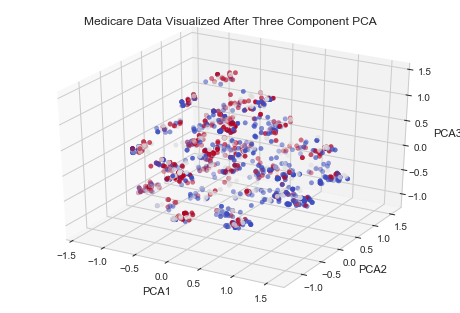

In [30]:

threedee_pca = plt.figure().gca(projection = '3d')
threedee_pca.scatter(pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'], c = pca_df['labels'], cmap=cm.coolwarm)
threedee_pca.set_xlabel('PCA1')
threedee_pca.set_ylabel('PCA2')
threedee_pca.set_zlabel('PCA3')
threedee_pca.set_title('Medicare Data Visualized After Three Component PCA')
plt.show()

#### Quick Summary of PCA Visualization
* When reduced to 3 components with PCA, there is not a clear division between the patient experience labels (indicated in by point color: red, blue, grey). 

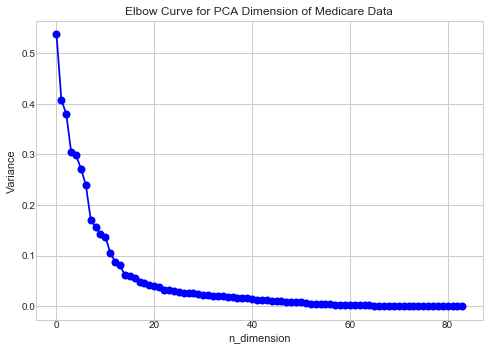

In [31]:
# Next, use an elbow curve of explained variance to identify the optimal number of components for machine learning.
pca = PCA()

pca_elbow = pca.fit(X_train)

variance = pca_elbow.explained_variance_
plt.plot(variance, 'bo-', markersize=8)
plt.xlabel("n_dimension")
plt.ylabel("Variance")
plt.title("Elbow Curve for PCA Dimension of Medicare Data")
plt.show()

#### Quick Summary of PCA Dimensions
* It looks like 15 components represents the inflection point of this curve and accounts for the majority of data variance.

In [32]:
# Instantiate a new PCA model with 15 components.
pca_preprocessing = PCA(n_components = 15)

In [33]:
# Apply PCA to training and test set (fit on test set).

X_train_pca = pca_preprocessing.fit(X_train)
X_train_pca = pca_preprocessing.transform(X_train)
X_test_pca = pca_preprocessing.transform(X_test)

In [34]:
# Make list of models to test with paramter dictionaries on data preprocessed with PCA.  

models_pca = []
models_pca.append(('LR', LogisticRegression()))
models_pca.append(('LDA', LinearDiscriminantAnalysis()))
models_pca.append(('KNN', KNeighborsClassifier()))
models_pca.append(('DTC', DecisionTreeClassifier()))
models_pca.append(('RFC', RandomForestClassifier()))
models_pca.append(('SVM', SVC()))
#models_opt.append(('NB', MultinomialNB(), NB_mult_params)) 

In [35]:
# Create loop to serially evaluate models using kfold and cross validation then print performance accuracy.

print("Table X. Accuracy of Patient Experience Predictions for each Machine Learning Algorithm After PCA Dimensional Reduction \n")

results_pca = []
names_pca = []
scoring = 'accuracy'

for name, model in models_pca:
    kfold= KFold(len(X_train_pca), n_folds = 5, random_state=2, shuffle=True)
    cv_results_pca = cross_val_score(model, X_train_pca, y_train, cv=kfold, scoring=scoring)
    results_pca.append(cv_results_pca)
    names_pca.append(name)
    mod = model
    mod.fit(X_train_pca, y_train)
    mod_pred = mod.predict(X_test_pca)
    mod_accuracy = accuracy_score(mod_pred, y_test)
    mod_rmse = (mse(mod_pred, y_test)**1/2)
    msg = "Cross Validation Accuracy %s: %f SD %f - Test Accuracy: %f RMSE: %f" % (name, cv_results_pca.mean(), cv_results_pca.std(),mod_accuracy, mod_rmse)
    print(msg) 

Table X. Accuracy of Patient Experience Predictions for each Machine Learning Algorithm After PCA Dimensional Reduction 

Cross Validation Accuracy LR: 0.485242 SD 0.036249 - Test Accuracy: 0.502262 RMSE: 0.452489
Cross Validation Accuracy LDA: 0.494307 SD 0.032650 - Test Accuracy: 0.500000 RMSE: 0.457014
Cross Validation Accuracy KNN: 0.464296 SD 0.030788 - Test Accuracy: 0.459276 RMSE: 0.470588
Cross Validation Accuracy DTC: 0.433741 SD 0.013801 - Test Accuracy: 0.393665 RMSE: 0.567873
Cross Validation Accuracy RFC: 0.458659 SD 0.015690 - Test Accuracy: 0.459276 RMSE: 0.504525
Cross Validation Accuracy SVM: 0.479027 SD 0.025738 - Test Accuracy: 0.484163 RMSE: 0.447964


In [36]:
# Make list of models to test with paramter dictionaries on data preprocessed with PCA.  

models_opt_pca = []
models_opt_pca.append(('LR', LogisticRegression(), LR_params))
models_opt_pca.append(('LDA', LinearDiscriminantAnalysis(), LDA_params))
models_opt_pca.append(('KNN', KNeighborsClassifier(),KNN_params))
models_opt_pca.append(('DTC', DecisionTreeClassifier(), DTC_params))
models_opt_pca.append(('RFC', RandomForestClassifier(), RF_params))
models_opt_pca.append(('SVM', SVC(), SVM_params))
#models_opt.append(('NB', MultinomialNB(), NB_mult_params)) 

In [37]:
# Serially evaluate models with GridSearchCV using defined parameters and print performance as accuracies with SDs.

print("Table X. Accuracy of Patient Experience Predictions for each Machine Learning Algorithm After Both Parameter Optimizaiton and PCA Dimensional Reduction \n")

results_params_pca = []
names_params_pca = []
scoring = 'accuracy'

for name, model, params in models_opt_pca:
    kfold= KFold(len(X_train_pca), n_folds = 5, random_state=2, shuffle=True)
    model_grid = GridSearchCV(model, params)
    cv_results_params_pca = cross_val_score(model_grid, X_train_pca, y_train, cv=kfold, scoring=scoring)
    results_params_pca.append(cv_results_params_pca)
    names_params_pca.append(name)
    msg = "Cross Validation Accuracy %s: %f (%f)" % (name, cv_results_params_pca.mean(), cv_results_params_pca.std())
    print(msg)

Table X. Accuracy of Patient Experience Predictions for each Machine Learning Algorithm After Both Parameter Optimizaiton and PCA Dimensional Reduction 

Cross Validation Accuracy LR: 0.485244 (0.033850)
Cross Validation Accuracy LDA: 0.494307 (0.032650)
Cross Validation Accuracy KNN: 0.467126 (0.032874)
Cross Validation Accuracy DTC: 0.428077 (0.013983)
Cross Validation Accuracy RFC: 0.450715 (0.026499)
Cross Validation Accuracy SVM: 0.488657 (0.020411)


#### Quick Summary of Default Algorithm Performance and Parameter Optimization After PCA
* It looks like PCA reduced accuracy of all of our models and so will not be pursued further in this analysis.

### Dimension Reduction of Medicare Data using LDA 

In [38]:
# First, let's use LDA to reduce the dimensions of Medicare data and inspect this visually.

lda_2 = LinearDiscriminantAnalysis()

lda_df = lda_2.fit_transform(X_train, y_train)
lda_df = pd.DataFrame(lda_df, columns = ['LDA1','LDA2'] )
lda_df.head()

# Append data frame with target data 

labels_train = y_train.copy()
labels_train = pd.DataFrame(labels_train)
labels_train.set_index(np.arange(0,1766,1))
lda_df['Patient Satifaction'] = labels_train['Patient_experience_g'].values

Figure 8. Visualizing Medicare Date with LDA


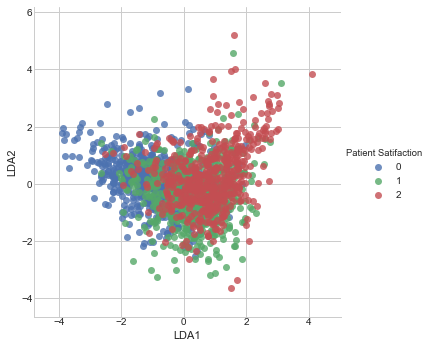

In [39]:
# Plot LDA data 

sns.lmplot("LDA1", "LDA2", data=lda_df, hue='Patient Satifaction', fit_reg=False)
plt.margins(.1)

print('Figure 8. Visualizing Medicare Date with LDA')
plt.savefig('Fig8.png', dpi=300)
sns.set_style("whitegrid")
plt.show()

#### Quick Summary of LDA Visualization
* It's fairly clear that LDA attempted to linearize data along three classification vectors (seen in blue, green, and red). However, there is substantial overlap between these three classes, which may make predicting patient experience with data clustered toward the center of this plot difficult.

#### Test Machine Learning with Cross Validation After LDA Dimensional Reduction

In [40]:
# Use LDA to reduce dimensions of data set.

lda_prep = LinearDiscriminantAnalysis()

X_train_lda = X_train.copy()
X_test_lda = X_test.copy()

lda_prep.fit(X_train_lda, y_train)
X_train_lda = lda_prep.transform(X_train_lda)
X_test_lda = lda_prep.transform(X_test_lda)

In [41]:
# Make list of models to test with paramter dictionaries on data preprocessed with LDA.  

models_lda = []
models_lda.append(('LR', LogisticRegression()))
models_lda.append(('LDA', LinearDiscriminantAnalysis()))
models_lda.append(('KNN', KNeighborsClassifier()))
models_lda.append(('DTC', DecisionTreeClassifier()))
models_lda.append(('RFC', RandomForestClassifier()))
models_lda.append(('SVM', SVC()))
#models_opt.append(('NB', MultinomialNB(), NB_mult_params)) 

In [42]:
# Create loop to serially evaluate models using kfold and cross validation then print performance accuracy.

print("Table X. Accuracy of Patient Experience Predictions for each Machine Learning Algorithm After LDA Dimensional Reduction \n")

results_lda = []
names_lda = []
scoring = 'accuracy'

for name, model in models_lda:
    kfold= KFold(len(X_train_lda), n_folds = 5, random_state=2, shuffle=True)
    cv_results_lda = cross_val_score(model, X_train_lda, y_train, cv=kfold, scoring=scoring)
    results_lda.append(cv_results_lda)
    names_lda.append(name)
    mod = model
    mod.fit(X_train_lda, y_train)
    mod_pred = mod.predict(X_test_lda)
    mod_accuracy = accuracy_score(mod_pred, y_test)
    mod_rmse = (mse(mod_pred, y_test)**1/2)
    msg = "Cross Validation Accuracy %s: %f SD %f - Test Accuracy: %f RMSE: %f" % (name, cv_results_lda.mean(), cv_results_lda.std(),mod_accuracy, mod_rmse)
    print(msg) 

Table X. Accuracy of Patient Experience Predictions for each Machine Learning Algorithm After LDA Dimensional Reduction 

Cross Validation Accuracy LR: 0.586055 SD 0.018185 - Test Accuracy: 0.527149 RMSE: 0.382353
Cross Validation Accuracy LDA: 0.582660 SD 0.018323 - Test Accuracy: 0.529412 RMSE: 0.364253
Cross Validation Accuracy KNN: 0.536778 SD 0.027982 - Test Accuracy: 0.509050 RMSE: 0.442308
Cross Validation Accuracy DTC: 0.479035 SD 0.031243 - Test Accuracy: 0.454751 RMSE: 0.455882
Cross Validation Accuracy RFC: 0.515277 SD 0.011724 - Test Accuracy: 0.493213 RMSE: 0.426471
Cross Validation Accuracy SVM: 0.582659 SD 0.015819 - Test Accuracy: 0.524887 RMSE: 0.376697


#### Parameter Optimization and Cross Validation After LDA Dimensional Reduction

In [43]:
# Make list of models to test with paramter dictionaries on data preprocessed with LDA.  

models_opt_lda = []
models_opt_lda.append(('LR', LogisticRegression(), LR_params))
models_opt_lda.append(('LDA', LinearDiscriminantAnalysis(), LDA_params))
models_opt_lda.append(('KNN', KNeighborsClassifier(),KNN_params))
models_opt_lda.append(('DTC', DecisionTreeClassifier(), DTC_params))
models_opt_lda.append(('RFC', RandomForestClassifier(), RF_params))
models_opt_lda.append(('SVM', SVC(), SVM_params))
#models_opt.append(('NB', MultinomialNB(), NB_mult_params)) 

In [44]:
# Serially evaluate models with GridSearchCV using defined parameters and print performance as accuracies with SDs.

print("Table X. Accuracy of Patient Experience Predictions for each Machine Learning Algorithm After Both Parameter Optimizaiton and LDA Dimensional Reduction \n")

results_params_lda = []
names_params_lda = []
scoring = 'accuracy'

for name, model, params in models_opt_lda:
    kfold= KFold(len(X_train_lda), n_folds = 5, random_state=2, shuffle=True)
    model_grid = GridSearchCV(model, params)
    cv_results_params_lda = cross_val_score(model_grid, X_train_lda, y_train, cv=kfold, scoring=scoring)
    results_params_lda.append(cv_results_params_lda)
    names_params_lda.append(name)
    msg = "Cross Validation Accuracy %s: %f (%f)" % (name, cv_results_params_lda.mean(), cv_results_params_lda.std())
    print(msg)

Table X. Accuracy of Patient Experience Predictions for each Machine Learning Algorithm After Both Parameter Optimizaiton and LDA Dimensional Reduction 

Cross Validation Accuracy LR: 0.586053 (0.019077)
Cross Validation Accuracy LDA: 0.582660 (0.018323)
Cross Validation Accuracy KNN: 0.567931 (0.023173)
Cross Validation Accuracy DTC: 0.514710 (0.019718)
Cross Validation Accuracy RFC: 0.539069 (0.011999)
Cross Validation Accuracy SVM: 0.580961 (0.017757)


#### Quick Summary of Default Algorithm Performance and Parameter Optimization After LDA
* It looks like LDA improved model accuracy by about 5% during cross validation, which is a nice improvement. However, it looks like LDA led to overfittings since the improved accuracy was not sustained when evaluated on test data.

#### Ensemble Modeling to Predict Patient Experience: Boosting and Bagging Methods
* Boosting and bagging are ensemble machine learning approaches that can combine multiple "weak" learners to improve performance.

In [45]:

print("Table X. Accuracy of Patient Experience Predictions using Ensemble Learning \n")

ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

results_ensembles = []
names_ensembles = []
for name, model in ensembles:
  kfold = KFold(len(X_train), n_folds = 5, random_state=2, shuffle=True)
  cv_results_ensembles = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results_ensembles.append(cv_results_ensembles)
  names_ensembles.append(name)
  msg = "%s: %f (%f)" % (name, cv_results_ensembles.mean(), cv_results_ensembles.std())
  print(msg)

Table X. Accuracy of Patient Experience Predictions using Ensemble Learning 

AB: 0.531141 (0.021901)
GBM: 0.535083 (0.027633)
RF: 0.491506 (0.031058)
ET: 0.473930 (0.023647)


In [46]:
# Ensemble Voting

from sklearn.ensemble import VotingClassifier

kfold= KFold(len(X_train), n_folds = 5, random_state=2, shuffle=True)

estimators = []

model1 = LogisticRegression()
estimators.append(("logistic", model1))
model2 = DecisionTreeClassifier()
estimators.append(("cart", model2))
model3 = SVC()
estimators.append(("svm", model3))
model4 = KNeighborsClassifier()
estimators.append(("KNN", model4))
model5 = RandomForestClassifier()
estimators.append(("RFC", model5))
model6 = MultinomialNB()
estimators.append(("NB", model6))
model7 = LinearDiscriminantAnalysis()
estimators.append(("LDA", model7))

voting = VotingClassifier(estimators)
results_voting = cross_val_score(voting, X_train, y_train, cv=kfold)

results_ensembles.append(results_voting)
names_ensembles.append('Voting')

print(results_voting.mean())

0.516396984683


#### Quick Summary of Ensemble Learning
* It looks like ensemble learning performed fairly well with an accuracy of ~53% in predicting patient experience using both adaboost and grandient boosting. 

#### Next, let's visually compare the cross validation results of the different algorithms and techniques:
* Default Parameters
* Paramater Optimization 
* Default Parameters with LDA Dimensional Reduction
* Default Parameters with LDA Dimensional Reduction
* Ensemble

Figure 7. Predictive Modeling of Patient Experience during Cross Validation


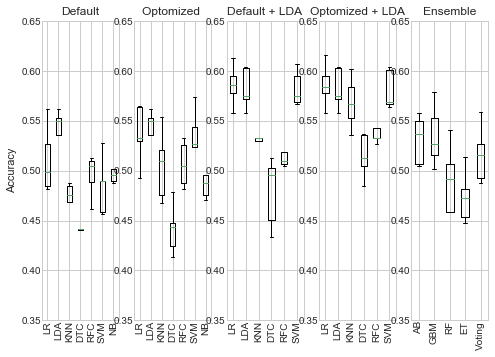

In [47]:
# Visualize model peformances before and after paramater optomization and LDA preprocessing.

fig = plt.figure()

ax1 = fig.add_subplot(1,5,1)
ax1.boxplot(results)
ax1.set_ylim([.35,.65])
ax1.set_title('Default')
ax1.set_ylabel('Accuracy')
ax1.set_xticklabels(names)
plt.xticks(rotation = 90)

ax2 = fig.add_subplot(1,5,2)
ax2.boxplot(results_params)
ax2.set_ylim([0.35,.65])
ax2.set_title('Optomized ')
ax2.set_xticklabels(names_params)
plt.xticks(rotation = 90)

ax3 = fig.add_subplot(1,5,3)
ax3.boxplot(results_lda)
ax3.set_ylim([.35,.65])
ax3.set_xticklabels(names_lda)
ax3.set_title('Default + LDA')
plt.xticks(rotation = 90)

ax4 = fig.add_subplot(1,5,4)
ax4.boxplot(results_params_lda)
ax4.set_ylim([0.35,.65])
ax4.set_title('Optomized + LDA')
ax4.set_xticklabels(names_params_lda)
plt.xticks(rotation = 90)
sns.set_style("whitegrid")

ax5 = fig.add_subplot(1,5,5)
ax5.boxplot(results_ensembles)
ax5.set_ylim([0.35,.65])
ax5.set_title('Ensemble')
ax5.set_xticklabels(names_ensembles)
plt.xticks(rotation = 90)
sns.set_style("whitegrid")
#plt.yticks("")

print('Figure 7. Predictive Modeling of Patient Experience during Cross Validation')
plt.savefig('Fig9.png', dpi=300)
plt.show()

#### Quick Summary of Visual Comparisons for Model Optimization
* Parameter optimization does not appear to drastically alter model accuracy after LDA preprocesing.
* LDA improved predictive accuracy during cross validation.  Again, optimization did not sizeably improve accuracy on LDA data but did reduce variance for seveal algorithms.

#### Model Validation Using the Entire Training Set

In [48]:
# Let's now fit a newly instantiated LR using the full training data and test its perfomance on the test data.

print("Table X. Logistic Regression Accuracy of Patient Experience Predictions \n")

lr_grid = LogisticRegression()
lr_grid = GridSearchCV(lr_grid, LR_params)
lr_grid.fit(X_train, y_train)
lr_grid_predicted = lr_grid.predict(X_test)
                        
print('Logistic Regression Accuracy: ' + str(accuracy_score(y_test, lr_grid_predicted)) + '\n')
confusion_matrix_lr = pd.DataFrame(confusion_matrix(y_test, lr_grid_predicted), index = ['Actual 0','Actual 1', 'Actual 2'], columns = ['Predicted 0','Predicted 1', 'Predicted 2'] )
print('Confusion Matrix')
print( confusion_matrix_lr)
print ('\n')
print('Classification Report')
print(classification_report(y_test, lr_grid_predicted))
print('Best parameters: %s ' % lr_grid.best_params_)

Table X. Logistic Regression Accuracy of Patient Experience Predictions 

Logistic Regression Accuracy: 0.524886877828

Confusion Matrix
          Predicted 0  Predicted 1  Predicted 2
Actual 0          126           30           15
Actual 1           49           55           43
Actual 2           33           40           51


Classification Report
             precision    recall  f1-score   support

          0       0.61      0.74      0.66       171
          1       0.44      0.37      0.40       147
          2       0.47      0.41      0.44       124

avg / total       0.51      0.52      0.51       442

Best parameters: {'C': 100} 


In [49]:
# Let's now fit a newly instantiated LR using the full training data and test its perfomance on the test data.

lr_grid = LogisticRegression()
lr_grid = GridSearchCV(lr_grid, LR_params)
lr_grid.fit(X_train_lda, y_train)
lr_grid_predicted = lr_grid.predict(X_test_lda)

print("Table X. Logistic Regression Accuracy of Patient Experience Predictions After LDA \n")

print('Logistic Regression Accuracy: ' + str(accuracy_score(y_test, lr_grid_predicted)) + '\n')
confusion_matrix_lr = pd.DataFrame(confusion_matrix(y_test, lr_grid_predicted), index = ['Actual 0','Actual 1', 'Actual 2'], columns = ['Predicted 0','Predicted 1', 'Predicted 2'] )
print('Confusion Matrix')
print( confusion_matrix_lr)
print ('\n')
print('Classification Report')
print(classification_report(y_test, lr_grid_predicted))
print('Best parameters: %s ' % lr_grid.best_params_)

Table X. Logistic Regression Accuracy of Patient Experience Predictions After LDA 

Logistic Regression Accuracy: 0.529411764706

Confusion Matrix
          Predicted 0  Predicted 1  Predicted 2
Actual 0          127           33           11
Actual 1           49           57           41
Actual 2           32           42           50


Classification Report
             precision    recall  f1-score   support

          0       0.61      0.74      0.67       171
          1       0.43      0.39      0.41       147
          2       0.49      0.40      0.44       124

avg / total       0.52      0.53      0.52       442

Best parameters: {'C': 10} 


#### Quick Summary of Logistic Regression Performance
* Logistic regression is about 52% accuracy in predicting patient hospital experience both with and without dimensional reduction via LDA.
* Logistic regression demonstrates greatest precision (~61%) when predicting <i>"Below National Average Patient Experience."</i>
<br><b>Precision: </b><i>True Positives / (True Positives + False Positives)</i><br>
* Logistic regression demonstrates greatest recall (~74%) when predicting <i>"Below National Average Patient Experience." </i>
<br><b>Recall: </b><i>True Positives / (True Positives + False Negatives)</i>

#### Overview Summary of Machine Learning Predictions of Patient Experience
* Unoptomized models peaked at around 51-53% accuracy in predicting patient hospital experience. 
* Parametere optomization slightly improved the predictive accuracy of these models but largely reduced the variance (likely by making them more biased). 
* Dimensional reduction using LDA improved model performance during cross validation (peaking near 58% accuracy), however, this improvement was likely due to a tendency for overfitting since this uptick in accuracy did not translate to the test set.
* Since logistic regression was among the best performing models, it was retrained using the entire training set. Under these circumstanced, it performed with about 53% accuracy during testing. This was true for both unaltered and dimensionally reduced (LDA) data.
<br><br>
* <b>Based on these finding</b>, logistic regression may be a suitable model to predict patience experience with this Medicare data as input but peaks at near 53% accuracy. Other linear models, such as LDA (for classification) and SVM (using a linear kernal) may also be suitable and performed comparably to logistic regression. Finally, dimensional reduction with LDA offers only a negligable improvement in model accuracy, but likely improves model speed and so can be considered a useful technique to include when predicting patient hospital experience. 

Next, let's use the probability estimates generated by logistic regression to classify predictions of patient experience as either "Low" or "High Confidence" using an arbitrary threshold.  This will enable subsetting on a segment of the data  that shows the greatest predictive accuracy. 

In [50]:
# Next, let's take advantage of Logistic Regressions' use of probability estimates for label classification to compare actual and predicted labeels
# ...and associated probabilites.

lr_probs = LogisticRegression(C = 0.001)
lr_probs = lr_probs.fit(X_train_lda, y_train)
lr_predictions = lr_probs.predict(X_test_lda)
lr_probabilities = lr_probs.predict_proba(X_test_lda)
lr_probabilities_df = pd.DataFrame(lr_probabilities)

# Add target data for comparison
labels_test = y_test.copy()
labels_test = pd.DataFrame(labels_test)
labels_test.set_index(np.arange(0,442,1))

lr_probabilities_df['Actual'] = labels_test['Patient_experience_g'].values
lr_probabilities_df['Predicted'] = lr_predictions

lr_probabilities_df.rename(columns = 
                           {0: 'Below National Average (0)', 
                            1: 'Same as National Average (1)', 
                            2: 'Above National Average (2)' }, inplace = True)

lr_probabilities_df['Predictive Confidence Rating'] = np.arange(0,442,1)

In [51]:
# First, let's use LDA to reduce the dimensions of Medicare data and inspect this visually.

lda_2 = LinearDiscriminantAnalysis(n_components=3)
lda_df = lda_2.fit(X_train, y_train)
lda_df_2 = lda_df.transform(X_test)

lda_df_2 = pd.DataFrame(lda_df_2, columns = ['LDA1','LDA2'] )
lda_df_2.head()

# Append data frame with target data 

labels_train_2 = y_test.copy()
labels_train_2 = pd.DataFrame(labels_train_2)
labels_train_2.set_index(np.arange(0,442,1))
lda_df_2['Patient Experience'] = labels_train_2['Patient_experience_g'].values
lda_df_2['Patient Experience Predicted'] = lr_predictions

In [52]:
# Make function to provide confideence ratings for each prediction of patient satisfaction. 
# High confidence is arbitrarily assigned as above 40% probability

def confidence_rating():
    for i in range(len(lr_probabilities_df)):
        
        if lr_probabilities_df.iloc[i,4] == 0 and lr_probabilities_df.iloc[i,0] > .40:
            lr_probabilities_df.iloc[i,5] = 'High'
        elif lr_probabilities_df.iloc[i,4] == 0 and lr_probabilities_df.iloc[i,0] <= .60:
            lr_probabilities_df.iloc[i,5] = 'Low' 
            
        elif lr_probabilities_df.iloc[i,4] == 1 and lr_probabilities_df.iloc[i,1] > .40:
            lr_probabilities_df.iloc[i,5] = 'High'
        elif lr_probabilities_df.iloc[i,4] == 1 and lr_probabilities_df.iloc[i,1] <= .60:
            lr_probabilities_df.iloc[i,5] = 'Low'  
            
        elif lr_probabilities_df.iloc[i,4] == 2 and lr_probabilities_df.iloc[i,2] > .40:
            lr_probabilities_df.iloc[i,5] = 'High'
        elif lr_probabilities_df.iloc[i,4] == 2 and lr_probabilities_df.iloc[i,2] <= .60:
            lr_probabilities_df.iloc[i,5] = 'Low'
            
confidence_rating()

In [53]:
print('Table X. Logistric Regression Probabilities and Confidence Rating for Hospital Patient Experience')
lr_probabilities_df.head()

Table X. Logistric Regression Probabilities and Confidence Rating for Hospital Patient Experience


,Below National Average (0),Same as National Average (1),Above National Average (2),Actual,Predicted,Predictive Confidence Rating
0,0.37,0.33,0.30,0,0,Low
1,0.25,0.36,0.39,2,2,Low
2,0.44,0.29,0.27,0,0,High
3,0.33,0.31,0.36,2,2,Low
4,0.29,0.32,0.39,1,2,Low


In [54]:
# Accuracy rate for predictions of patient experience with 'High' confidence rating

h = lr_probabilities_df[lr_probabilities_df['Predictive Confidence Rating'] == 'High']
all_h = float(len(h))
true_h = float(len(h[h['Actual'] == h['Predicted']]))
h_accuracy = (true_h/all_h)*100

all_h_l = float(len(lr_probabilities_df))
percent_h_all = (all_h/all_h_l)*100

print(str(percent_h_all) + "% of patient experience predictions are rated as 'high confidence' (i.e. > 40% probability)") 
print("Highly ratinged predictions have an accuracy of " + str(h_accuracy) + "%")

33.4841628959% of patient experience predictions are rated as 'high confidence' (i.e. > 40% probability)
Highly ratinged predictions have an accuracy of 72.2972972973%


In [55]:
lr_probabilities_df_high = lda_df_2.copy()
lr_probabilities_df_high['Predictive Confidence Rating'] = lr_probabilities_df['Predictive Confidence Rating']

Figure 8. Visualizing Medicare Date with LDA


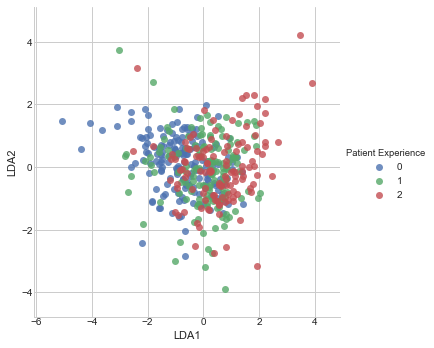

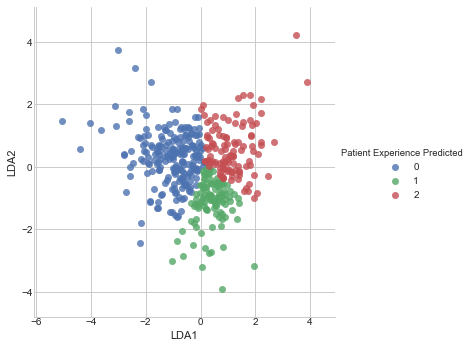

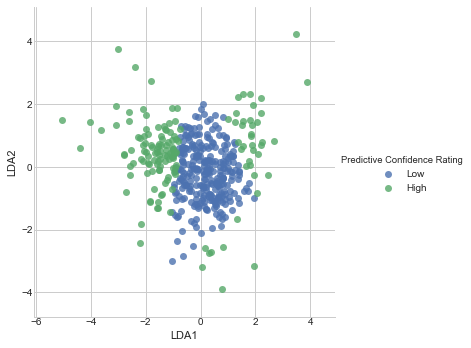

In [56]:
sns.lmplot("LDA1", "LDA2", data=lda_df_2, hue='Patient Experience', fit_reg=False)
plt.margins(.1)

sns.lmplot("LDA1", "LDA2", data=lda_df_2, hue='Patient Experience Predicted', fit_reg=False)
plt.margins(.1)

sns.lmplot("LDA1", "LDA2", data=lr_probabilities_df_high, hue='Predictive Confidence Rating',  fit_reg=False)
plt.margins(.1)
sns.set_style("whitegrid")

print('Figure 8. Visualizing Medicare Date with LDA')
plt.savefig('Fig8x.png', dpi=300)
plt.show()

#### Quck Summary of Logistic Regression Prababilities to Interrogate Patient Experience Predictions
* ~33% of patient experience predictions using logistic regression have a > 40% probability in their predicted label. This subset of predictions was arbirarily classified "high confidence".
* Highly confident predictions have an accuracy of ~72%.
* A 40% prabability may therefore be a useful threshold to categorize predictions with a high confidence, although this could be optimized to also include both a mid-range threshold for ambiguous predictions and a narrower threshold for low confidence predictions.

#### Identifying Important Features with Recursive Feature Elimination and Cross-Validation
* Features...

In [57]:
# Next, let's look at the most important features for LDA using the SciKit-Learn's RFECV method. 

lr_rfecv = LogisticRegression()

selector = RFECV(estimator = lr_rfecv, cv = 5, scoring = 'accuracy')
selector.fit(X_train, y_train)

print('Optimal number of features: %d' % selector.n_features_)
print('\nFeature Ranking')
print(selector.ranking_)
print('\nFeature Support')
print(X_train.columns[selector.support_])

Optimal number of features: 15

Feature Ranking
[70  1 69  1  1 17 60 61 59 27 30  1 40 31 41  5 26 55 25 33  7 56 45  1 58
 57 68 64 23 43  1 67 19  8 53  1  4 12 20 32 51 15 63 14 36 21  1 49 37 38
 42 22 46 29 50  6  1  1  3  1 18  1 48 39  9 65 34  1  1 54 44  2 66 35 13
  1 16 24 28 10 11 47 52 62]

Feature Support
Index([u'Number_of_Discharges_r', u'Number_of_Readmissions_r', u'MSPB_m',
       u'Ownership_g_Proprietary',
       u'Timeliness_of_care_g_Below the National average', u'State_name_AR',
       u'State_name_DC', u'State_name_LA', u'State_name_NE', u'State_name_NH',
       u'State_name_NM', u'State_name_NY', u'State_name_SC', u'State_name_SD',
       u'State_name_WI'],
      dtype='object')


Figure 9. Logistic Regression Model Accuracy with Feature Elimination


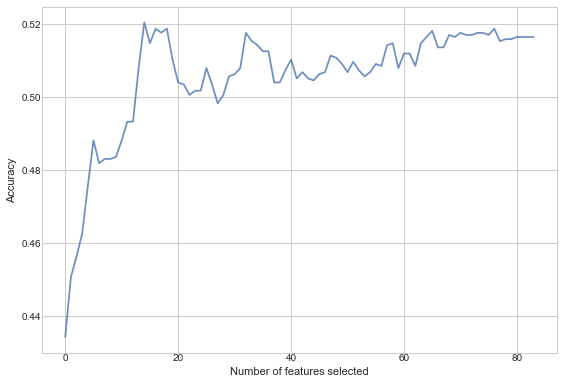

In [58]:
#Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Accuracy")
plt.plot(selector.grid_scores_, alpha=0.8)
plt.tight_layout()
sns.set_style("whitegrid")

print('Figure 9. Logistic Regression Model Accuracy with Feature Elimination')
plt.savefig('Fig10.png', dpi=300)
plt.show()

#### Quck Summary of  Features with Recursive Feature Elimination and Cross-Validation (RFECV)
* 15 of 84 features were identified as important to predictive accuracy for logistic regression. They are as follows:
* Number of Discharges
* Number of Readmissions
* MSPB
* Proprietary Ownership 
* A <i>'Below National Average'</i> Timeliness of Care rating
* Geography/Hospital Location: AR, DC, LA, NE, NH, NM, NY, SC, SD,WI

### Summary of Key Findings 
* Patient satisfaction can be predicted with approximatley 50% accuracy using publically available Medicare hospital  metrics. 
* The best performing models were logistic regression, LDA, and SVM (using a linear kernal). This suggests that linear  modeling is most effective with this Medicare data set. 
* Both paramater optimization and dimension reduction with LDA improved model accuracy ~ 2-5%.
* Using a 40% probability threshold for logistic regression predictions raised predictive accuracy to ~72%; however, this is only effective for a subset of predictions (~33%) that meet this threshold. 
* Fifteen features were identified that account for most of logistic regression prediction accuracy. These include readmissions information (discharge and readmissions numbers), MSPB, whether or not a hospital is of proprietary ownership, whether or not a hospital recieve a <i>'Below National Average'</i> Timeliness of Care score, and whether or not a hospital is located in AR, DC, LA, NE, NH, NM, NY, SC, SD, WI.

### Key Recommendations
* A ~ 20% increase in predictive accuracy over blind guessing can be achieved using the Medicare Hospital Compare data included in this analysis; however, it is advisable to investigate additional hospital attributes that might provide greater predictive accuracy.
* When predicting patient experience, attention should focus on readmissions metrics, spending per patient, ownership model, timeliness of care, and hospital geography.
* Differentiating between 'low', 'med', and 'high' subjective ratings is a difficult task and there is a good rationale to force a binary ratings system (i.e. "poor" vs "good").  With the current dataset this could be achieved by recategorizing <i>"Same as National Average"</i> and <i>"Above National Average Patient Experience"</i> as an equivalent positive rating. This would likely increase predictive accuracy. Additionally, it is reasonable to assume that a low patient experience rating is more consequential to the patient and their healthcare purchasing behavior than a neutral versus positive patient experience rating. Thus, reliably detecting poor experience may be of greater value to both the patient/healthcare consumer and healthcare provider than the more granular classifications evaluated in this analysis.

##### <center>Special thanks to my mentor, Hobson Lane, and the greater SpringBoard community <br> for their guidance, critiques, and support.</center>